In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy.cluster.hierarchy import dendrogram



import warnings
warnings.filterwarnings("ignore")


# **Question 1: import the red and the white wine csv files into separate pandas dataframes from the following website.**

In [ ]:
import pandas as pd

# Load the red wine dataset
red_wine_df = pd.read_csv('winequality-red.csv', sep=';')


# Load the white wine dataset
white_wine_df = pd.read_csv('winequality-red.csv', sep=';')

# **Question 2: Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe**

In [ ]:
# Add a new column 'winetype' to each DataFrame
# 0 = white wine, 1 = red wine
white_wine_df['winetype'] = 0
red_wine_df['winetype'] = 1

# Combine both datasets into a single DataFrame
combined_wine_df = pd.concat([white_wine_df, red_wine_df], ignore_index=True)
print(combined_wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  winetype  
0      9.4        5         0  
1      9.8        5   

# **Question 3: Use K Means Cluster Analysis to identify clusters of observations that have high and low values of the wine quality (assume all variables are continuous).**

In [ ]:
red_wine_df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
white_wine_df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

The values of wine quality falls between 3 and 8, the average wine quality is 5.64

# **Question 3A: Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?**

([<matplotlib.axis.XTick at 0x7d9fbc76faf0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

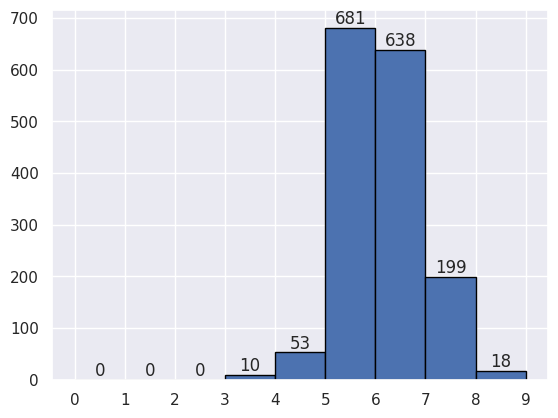

In [ ]:
#Creating  histogram of the wine quality

bins=range(0,10,1)
counts, edges, bars = plt.hist(red_wine_df[['quality']], bins, edgecolor='black')

plt.bar_label(bars) #Labelling the bars with the count of run number in each bin
plt.xticks(range(0,10,1))

In [ ]:
#Scaling X training and testing data using the StandardScaler function
scaler = StandardScaler()
scaler.fit(red_wine_df)
rw_scaled = scaler.transform(red_wine_df)
rw_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.96024611,
        -0.78782264,  0.        ],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.58477711,
        -0.78782264,  0.        ],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.58477711,
        -0.78782264,  0.        ],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54162988,
         0.45084835,  0.        ],
       [-1.39015528,  0.65462046, -0.77526673, ..., -0.20930812,
        -0.78782264,  0.        ],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.54162988,
         0.45084835,  0.        ]])

In [ ]:
rw_scaled = pd.DataFrame(rw_scaled, index=red_wine_df.index, columns=red_wine_df.columns)
rw_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0.0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0.0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,0.0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0


Text(0.5, 1.0, 'Elbow Curve')

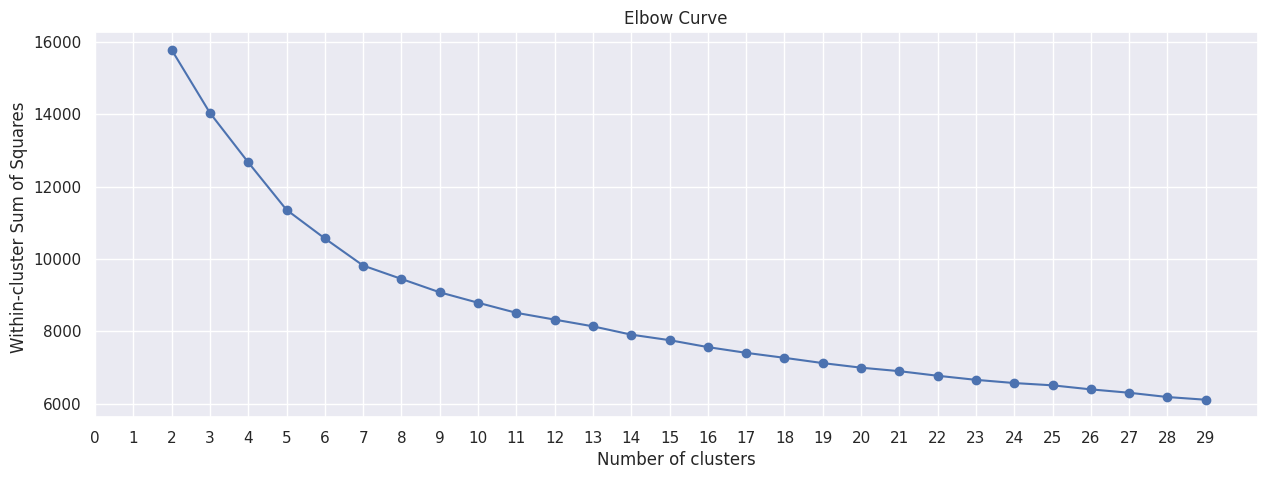

In [ ]:
WCSS = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rw_scaled)
    WCSS.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 30), WCSS, marker='o')
plt.grid(True)
plt.xticks(range(0,30,1))
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares ')

plt.title('Elbow Curve')

The Elbow Curve shows how clustering more tightly packs the wine data, reducing errors (WCSS) with each added cluster. But, adding clusters helps less over time. We're looking for the cluster number (k) where adding more stops being as effective, marking where the curve's slope changes significantly.


Though I might think of using calculus to find the key point where adding clusters doesn't help as much, each cluster number (k) acts more like a sharp turn than a smooth curve, so calculus isn't the right tool. Instead, I'll look closely to see where the drop in errors (WCSS) slows down the most. I'm aiming to find the spot where the difference between the changes in WCSS around a cluster number (k) is the biggest. This boils down to finding the largest value of the formula that measures this change.

In simple terms, I'm trying to spot where on the Elbow Curve the steepness changes notably by comparing the rate of error decrease from one cluster to the next. This isn't straightforward with the wine data, so I have to sort of eyeball the graph to figure out where this change in slope happens.

AKA I have to find where the magnitude of the slope of the  WCSS  starts to significantly decrease.

In [ ]:
WCSS_df = pd.DataFrame(WCSS, columns=["WCSS"], index=range(2, 30))
WCSS_df['Slope'] = WCSS_df['WCSS'].diff()
WCSS_df['Difference in Slopes'] = WCSS_df['Slope'].diff()


WCSS_df.head(10)

,WCSS,Slope,Difference in Slopes
2,15779.428705,NaN,NaN
3,14035.528125,-1743.900579,NaN
4,12669.477769,-1366.050356,377.850223
5,11357.069312,-1312.408456,53.641900
6,10566.821277,-790.248036,522.160421
7,9817.503267,-749.318009,40.930027
8,9447.706627,-369.796641,379.521369
9,9078.664238,-369.042388,0.754252
10,8790.211625,-288.452613,80.589775
11,8511.199812,-279.011813,9.440800


As I said before, I'm looking for the point where the drop in WCSS (error measure) starts to get noticeably smaller. This happens when I go from 4 to 5 clusters. Moving from 4 to 5 clusters, WCSS goes down by 1312.41. But from 5 to 6 clusters, it drops only by 790.25. The difference in how much it decreases between these steps is 522.16, which is the biggest shift I see. So, I've figured out that 5 clusters is the best choice for organizing the red wine data.

In [ ]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(rw_scaled)
y_pred = km.predict(rw_scaled)


km.predict(rw_scaled)


km.labels_

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

In [ ]:
rw_scaled['cluster'] = km.labels_+1
rw_scaled.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0,4
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0.0,4
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0.0,4
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,0.0,5
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0,4
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0,4
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823,0.0,4
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519,0.0,4
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519,0.0,4
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823,0.0,1


## Question 3 Plots

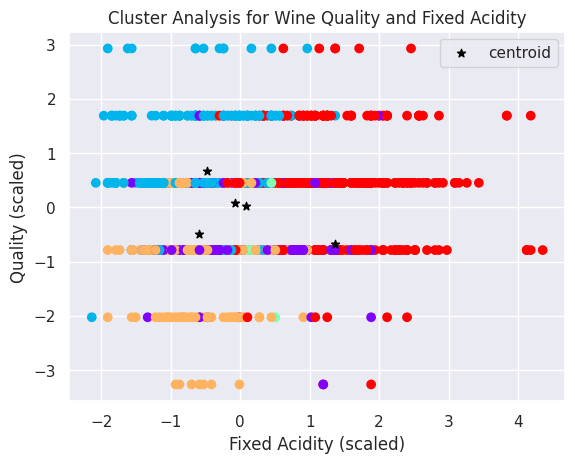

In [ ]:
plt.scatter(rw_scaled["fixed acidity"], rw_scaled["quality"], c=y_pred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('Fixed Acidity (scaled)')
plt.ylabel('Quality (scaled)')
plt.title('Cluster Analysis for Wine Quality and Fixed Acidity')
plt.legend()
plt.show()

The chart shows groups formed by the k-means method on the red wine data.

It's hard to understand the chart because even though wine quality is shown with numbers, there are only six different values. So, I'll sort the wines into groups and see which group has the highest average Z-score for quality. Then, I'll look at the characteristics of wines in that group, focusing on those with high Z-scores. This will help me see which traits are common in better and worse wines.

In [ ]:
 #Creating a new dataframe that groups by the mean of the clusters
rw_scaled_cluster = rw_scaled.groupby('cluster').mean()
rw_scaled_cluster.reset_index(inplace=True)
rw_scaled_cluster

rw_scaled_cluster.sort_values(by=['quality'], ascending=False)

,cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
1,2,-0.599699,-0.485038,-0.108176,-0.221834,-0.380796,0.184010,-0.201640,-1.139002,0.528551,0.200265,1.215054,0.832554,0.0
4,5,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409,0.0
2,3,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695,0.0
0,1,-0.078895,0.085668,0.098161,0.433196,0.037128,1.085767,1.381157,0.384663,-0.156750,-0.184107,-0.618165,-0.463049,0.0
3,4,-0.483685,0.675532,-0.791517,-0.231587,-0.078366,-0.401776,-0.384522,-0.095559,0.409664,-0.419668,-0.425757,-0.465275,0.0


The top average Z-scores for wine quality are found in groups 2 and 5, scoring 0.833 and 0.402. This means these wines are considered higher quality. On the other hand, groups 1, 3, and 4 have negative average Z-scores, showing they are of lower quality.

I found which traits are common in good wines by checking if a trait has good scores in both groups 2 and 5 and bad scores in at least two of the groups 1, 3, and 4. For bad wines, I looked for the opposite pattern.

Only alcohol and sulphates have good scores in the high-quality groups. Alcohol also has bad scores in the low-quality groups 1, 3, and 4. Sulphates have one high score in group 3 but are still considered good because of their scores in groups 1 and 4.

Volatile acidity has bad scores in the high-quality groups and good scores in the low-quality ones, meaning it's a trait of lower quality wines. Other traits like fixed acidity, chlorides, and total sulfur dioxide also match lower quality wines because they have bad scores in the high-quality groups and at least two good scores in the low-quality groups.

From this, it looks like alcohol and sulphates are key for high-quality wine, while it's best to keep volatile acidity low.

# **Question 4: Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality (assume all variables are continuous). Use complete linkage and the same number of groups that you found to be the most meaningful in the last question. Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than K Means Clustering? Present any figures that assist you in your analysis.**

In [ ]:
from scipy.spatial.distance import pdist, squareform #import methods from scipy
from scipy.cluster.hierarchy import linkage

#Dropping clusters column from Question 1
rw_scaled=rw_scaled.drop(columns=['cluster'])

row_clusters = linkage(pdist(rw_scaled, metric='euclidean'), method='complete') # define distance metric and linkage for model
row_clusters


array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.36000000e+02, 1.41000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.19100000e+03, 3.19200000e+03, 1.31143245e+01, 1.58100000e+03],
       [3.19300000e+03, 3.19400000e+03, 1.48474647e+01, 1.59700000e+03],
       [3.15800000e+03, 3.19500000e+03, 1.87246885e+01, 1.59900000e+03]])

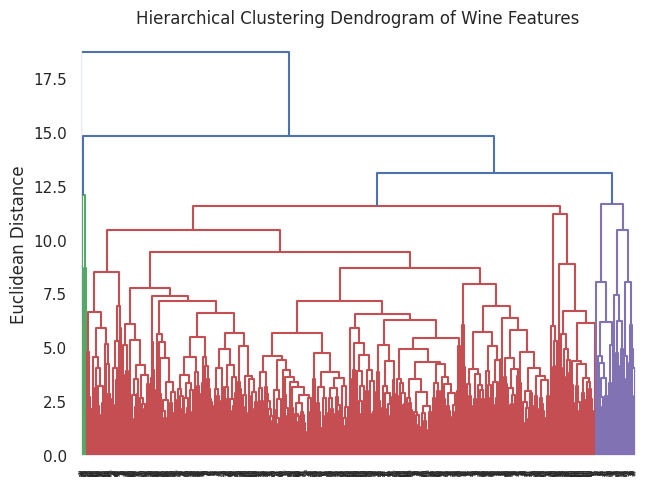

In [ ]:
row_dendr = dendrogram(row_clusters, labels=rw_scaled.index, leaf_font_size=2, leaf_rotation=90)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram of Wine Features')
plt.show()

The dendrogram above groups things that are alike using a measure called Euclidean distance, basically a fancy way of measuring how close or far apart things are based on their characteristics. When branches in the dendrogram are close together, it means the items in that group are very similar. While dendrograms help us see how items group together, this one might be hard to understand. So, I made a heatmap below to better show where items are similar.








Text(0.5, 1.0, 'Hierarchical Clustering Heatmap of Wine Features and Observations')

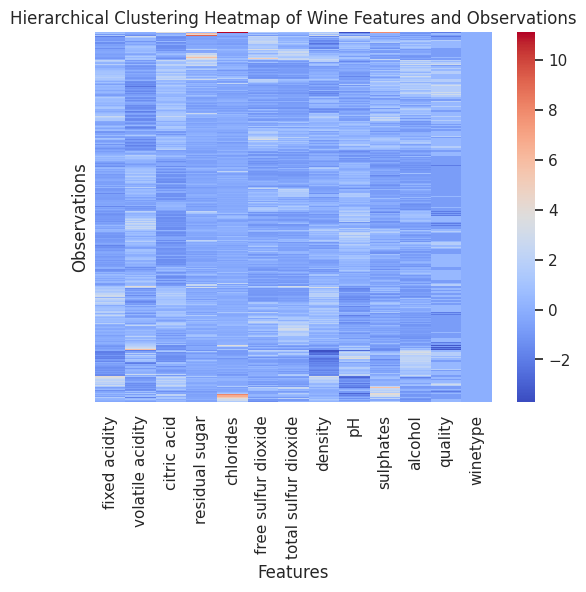

In [ ]:
leaves = row_dendr['leaves']
rw_scaled_ordered = rw_scaled.iloc[leaves, :]

heatmap = sns.heatmap(rw_scaled_ordered, cmap='coolwarm', xticklabels=True, yticklabels=False)

plt.xlabel('Features')
plt.ylabel('Observations')
plt.title('Hierarchical Clustering Heatmap of Wine Features and Observations')


The heatmap is easier to understand than the dendrogram. It shows how different the observations are. For example, at the bottom, you can see dark blue or light red spots for things like chlorides, pH, and sulphates, which stand out from the light blue of other traits. This means their values don't match up with the rest. Also, the way these traits' colors look different from the wine quality color shows they vary in value.

Just like with my K-means analysis, I'm going to find the average Z-score for each trait across the five groups. This will help me see how these traits group together with the quality of the wine.

In [ ]:
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(rw_scaled)    # extract cluster labels for each observation in data
labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
rw_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0.0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0.0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,0.0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823,0.0
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519,0.0
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519,0.0
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823,0.0


In [ ]:
rw_scaled['cluster'] = labels+1
rw_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0.0,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0.0,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,0.0,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0,2
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0.0,2
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823,0.0,2
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519,0.0,2
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519,0.0,2
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823,0.0,2


In [ ]:
rw_scaled_cluster = rw_scaled.groupby('cluster').mean()
rw_scaled_cluster.reset_index(inplace=True)
rw_scaled_cluster

rw_scaled_cluster.sort_values(by=['quality'], ascending=False)

,cluster,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4,5,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629,0.0
0,1,1.117620,-0.349720,1.004432,-0.095057,1.470947,-0.269898,0.035390,0.800639,-1.292270,1.717645,-0.341875,0.114017,0.0
2,3,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719,0.0
1,2,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170,0.0
3,4,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158,0.0


Now, unlike with K-means, I found three groups (1, 3, and 5) with good scores for wine quality and two groups (2 and 4) with bad scores.

To see which traits match up with better wines, I looked for traits that have good scores in at least two of the groups 1, 3, and 5 and bad scores in both groups 2 and 4. For worse wines, I checked for the reverse pattern.

Alcohol is the only trait that fits my rules. It scored low in group 3 but high in groups 1 and 5, and it scored low in both groups 2 and 4. Even though residual sugar and citric acid scored high in groups 1, 3, and 5, they only scored low in group 2, making it hard to say how they relate to lower quality wines.

For lower quality wines, free sulfur dioxide and total sulfur dioxide scored high in the low-quality groups 2 and 4 but also scored high in groups 1 and 3, so it's tough to find a clear pattern for how these traits relate to wine quality.

My analysis suggests alcohol might still be key to making high-quality wine, but it's not clear how other traits should be adjusted to ensure a wine is high quality.

# **Question 5: Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components?**